### This is the notebook for creating tests and performing them.

See the note on data structure in solution.ipynb and in solution.py.

In [1]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import unittest

import solution as sl ## the solution notebook exported as a script

In [2]:
# Function which displays the paths

def displ(theo,expe):
    # theo is the theoretical path
    # expe is the one really performed
    plt.clf()
    plt.figure()
    plt.plot([theo[i][0] for i in range(len(theo))],[theo[i][1] for i in range(len(theo))],\
             c='r',label = "theoretical")
    #plt.tit("theoretical")
    plt.plot([expe[i][0] for i in range(len(expe))],[expe[i][1] for i in range(len(expe))],\
             c='g',label = "experimental")
    #plt.label("experimental")
    plt.title("Paths")
    plt.legend()
    plt.grid(True)
    plt.show()

<Figure size 432x288 with 0 Axes>

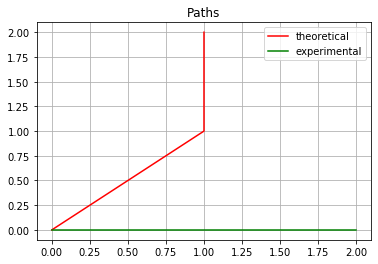

In [3]:
# Test of the function displ.

theo = [(0,0),(1,1),(1,2)]
expe = [(0,0),(1,0),(2,0)]

displ(theo,expe)
# It works !

In [4]:
# Oracle tests
# Oracles are found on https://github.com/rouvoy/indoor-location-oracles

def oracle_parser(ORACLE_FILE):
    """
    Text parser reading the oracle files and converting its content to lists of tuples
    
    arg1: ORACLE_FILE. A string, the path to the file containing the oracle test to read.
    return: theoretical_path. A list of tuples, the coordiantes of the theretical path.
            experimental_path. A list of tuples, the coordiantes of the experimental path.
            expected_result. An int or a float, the expected result computed by trajectory_error().
            error. An int or a float, the error allowed on the computation.
    """
    # define results:
    theoretical_path = []
    experimental_path = []
    # fetch the file
    oracle = open(ORACLE_FILE,mode='r')
    # extract data
    theoretical_x_axis = oracle.readline()
    theoretical_y_axis = oracle.readline()
    experimental_x_axis = oracle.readline()
    experimental_y_axis = oracle.readline()
    expected_result = oracle.readline()
    error = oracle.readline()
    # process the strings
    theoretical_x_axis = [float(x) for x in theoretical_x_axis.split(",")]
    theoretical_y_axis = [float(x) for x in theoretical_y_axis.split(",")]
    experimental_x_axis = [float(x) for x in experimental_x_axis.split(",")]
    experimental_y_axis = [float(x) for x in experimental_y_axis.split(",")]
    for i in range(len(theoretical_x_axis)):
        theoretical_path.append((theoretical_x_axis[i],theoretical_y_axis[i]))
    for i in range(len(experimental_x_axis)):
        experimental_path.append((experimental_x_axis[i],experimental_y_axis[i]))
    expected_result = float(expected_result)
    error = float(error)
    # returns
    return theoretical_path, experimental_path, expected_result, error
    
def perform_oracle_test(ORACLE_FILE):
    """
    Perform oracle test
    
    arg1: ORACLE_FILE. A string, the ORACLE_FILE to the oracle.
    """
    
    # step 1: read the oracle and extract its data:
    theoretical_path, experimental_path, expected_result, error = oracle_parser(ORACLE_FILE)
    
    # step 2: compute the error on the trajectory:
    myResults = sl.trajectory_error(theoretical_path, experimental_path)
    
    # step 3: compare test results:
    if myResults > expected_result-error and myResults < expected_result+error:
        ## test successfull
        print("Success")
    else:
        ## test failed
        print("Failure")
    # display
    displ(theoretical_path,experimental_path)

In [5]:
#perform_oracle_test("./indoor-location-oracles/Oracles/[test0]simple.txt")

__Unit testing using the unittest.py module__

In [6]:
class TestTrajectoryError(unittest.TestCase):
    """
    Unit testing code for the trajectory_error brick. Each test case represent a scenario
    with its unique theoretical and experimental trajectories.
    """

    def test_equal_paths(self): # -> Test 1
        theo = [(0,x) for x in range(5)]
        expe = [(0,x) for x in range(5)]
        #displ(theo,expe)
        
        self.assertEqual(0, sl.trajectory_error(theo, expe))# Difference expected : 0
    
    def test_equal_paths_with_u_turn(self): # -> Test 2
        theo = [(0,2),(1,2),(1,0),(0,0)]
        expe = [(0,2),(1,2),(1,0),(0,0)]
        #displ(theo,expe)
        
        self.assertEqual(0, sl.trajectory_error(theo, expe))# Difference expected : 0
        
    def test_straight_parallel(self): # -> Test 3
        theo = [(0,x) for x in range(5)]
        expe = [(1,x) for x in range(5)]
        #displ(theo,expe)
        
        #self.assertEqual(1, sl.trajectory_error(theo, expe))# Difference expected : (area = 4 )/ (length = 4) = 1
        np.testing.assert_almost_equal(1, sl.trajectory_error(theo, expe), 5)
        
    def test_straight_crossing(self): # -> Test 4
        theo = [(0,0),(0,1)]
        expe = [(1,0),(-1,1)]
        #displ(theo,expe)
        
        self.assertEqual(0.5, sl.trajectory_error(theo, expe))# Difference expected : 0.5
        
    def test_different_length(self): # -> Test 5
        theo = [(0,0),(5,0)]
        expe = [(0,0)] + [(x,1) for x in range(6)] + [(5,0)]
        #displ(theo,expe)
        
        #self.assertEqual(1, sl.trajectory_error(theo, expe))# Difference expected : 1
        np.testing.assert_almost_equal(1, sl.trajectory_error(theo, expe), 5)
        
    def test_different_length_crossing(self): # -> Test 6
        theo = [(0,0),(0,2)]
        expe = [(0,0),(1,0),(-1,1),(1,2),(0,2)]
        #displ(theo,expe)
        
        self.assertEqual(0.5, sl.trajectory_error(theo, expe))# Difference expected : 0.75

In [7]:
class TestPathLength(unittest.TestCase):
    """
    Unit testing code for the path length measurement bricks. This test both the seg_length() and apth_length() functions.
    """
    
    def test_null_segment(self):
        a = (5,5)
        b = (5,5)
        
        self.assertEqual(0,sl.seg_length(a,b))
    
    def test_simplest_segment(self):
        a = (0,0)
        b = (1,0)
        
        self.assertEqual(1, sl.seg_length(a,b))
        
    def test_simplest_segment_inverted(self):
        a = (0,0)
        b = (1,0)
        
        self.assertEqual(1, sl.seg_length(b,a))
        
    def test_simplest_path(self):
        path = [(0,0),(0,1),(1,1)]
        
        self.assertEqual(2, sl.path_length(path))
        
    def test_simplest_path_inverted(self):
        invPath = [(0,0),(0,-1),(-1,-1)]
        
        self.assertEqual(2, sl.path_length(invPath))
        

In [8]:
class TestIntersection(unittest.TestCase):
    """
    Unit testing code for the intersection locator brick.
    """

    def test_simplest_intersection(self):
        segA_1 = (0,0)
        segA_2 = (2,2)
        segB_1 = (2,0)
        segB_2 = (0,2)
        
        self.assertEqual((1.0,1.0), sl.intersection(segA_1, segA_2, segB_1, segB_2))
        
    def test_no_intersection(self):
        segA_1 = (0,0)
        segA_2 = (0,1)
        segB_1 = (1,0)
        segB_2 = (1,1)
        
        self.assertEqual(None, sl.intersection(segA_1, segA_2, segB_1, segB_2))
        
    def test_common_point(self):
        segA_1 = (0,0)
        segA_2 = (2,2)
        segB_1 = (0,0)
        segB_2 = (0,-1)
        
        self.assertEqual((0.0,0.0), sl.intersection(segA_1, segA_2, segB_1, segB_2))
        
    def test_permutation_order_one(self):
         ## same segments as test_simplestIntersection but given in a different order
        segA_1 = (2,2)
        segA_2 = (0,0)
        segB_1 = (2,0)
        segB_2 = (0,2)
        
        self.assertEqual((1.0,1.0), sl.intersection(segA_2, segA_1, segB_1, segB_2))
        
    def test_permutation_order_two(self):
         ## same segments as test_simplestIntersection but given in a different order
        segA_1 = (0,0)
        segA_2 = (2,2)
        segB_1 = (0,2)
        segB_2 = (2,0)
        
        self.assertEqual((1.0,1.0), sl.intersection(segA_1, segA_2, segB_2, segB_1))
        
    def test_permutation_order_three(self):
         ## same segments as test_simplestIntersection but given in a different order
        segA_1 = (2,2)
        segA_2 = (0,0)
        segB_1 = (0,2)
        segB_2 = (2,0)
        
        self.assertEqual((1.0,1.0), sl.intersection(segB_1, segB_2, segA_1, segA_2))
        

In [9]:
class TestOrthogonalProjection(unittest.TestCase):
    """
    Unit testing code for the orthogonal projection brick.
    """
    
    def test_projection_not_in_segment(self):
        segA_1 = (0,0)
        segA_2 = (0,2)
        y = (-1,-1)
        
        self.assertEqual((0,-1), sl.ortogonal_projection(segA_1, segA_2, y))

    def test_projection_on_vertical_line_from_right(self):
        segA_1 = (0,0)
        segA_2 = (0,2)
        y = (1,1)
        
        self.assertEqual((0,1), sl.ortogonal_projection(segA_1, segA_2, y))
        
    def test_projection_on_vertical_line_from_left(self):
        segA_1 = (0,0)
        segA_2 = (0,2)
        y = (-1,1)
        
        self.assertEqual((0,1), sl.ortogonal_projection(segA_1, segA_2, y))
        
    def test_projection_on_horizontal_line_from_above(self):
        segA_1 = (0,0)
        segA_2 = (2,0)
        y = (1,1)
        
        self.assertEqual((1,0), sl.ortogonal_projection(segA_1, segA_2, y))
    
    def test_projection_on_horizontal_line_from_below(self):
        segA_1 = (0,0)
        segA_2 = (2,0)
        y = (1,-1)
        
        self.assertEqual((1,0), sl.ortogonal_projection(segA_1, segA_2, y))
    
    def test_already_in_segment(self):
        segA_1 = (0,0)
        segA_2 = (0,2)
        y = (0,1)
        
        self.assertEqual((0,1), sl.ortogonal_projection(segA_1, segA_2, y))
        
    def test_vertically_aligned_above_segment(self):
        segA_1 = (0,0)
        segA_2 = (0,1)
        y = (0,2)
        
        self.assertEqual((0,2), sl.ortogonal_projection(segA_1, segA_2, y))
        
    def test_vertically_aligned_under_segment(self):
        segA_1 = (0,0)
        segA_2 = (0,1)
        y = (0,-1)
        
        self.assertEqual((0,-1), sl.ortogonal_projection(segA_1, segA_2, y))
    
    def test_diagonally_aligned_above_segment(self):
        segA_1 = (0,0)
        segA_2 = (1,1)
        y = (2,2)
        
        self.assertEqual((2,2), sl.ortogonal_projection(segA_1, segA_2, y))

In [10]:
class TestComputeArea(unittest.TestCase):
    """
    Unit testing code for the area computation brick in the case of a trapezium.
    """

    def test_identical_segments(self):
        segA_1 = (0,0)
        segA_2 = (2,2)
        segB_1 = (0,0)
        segB_2 = (2,2)
        
        self.assertEqual(0, sl.compute_area(segA_1, segA_2, segB_1, segB_2))
        
    def test_square(self):
        segA_1 = (0,0)
        segA_2 = (0,1)
        segB_1 = (1,1)
        segB_2 = (1,0)
        
        self.assertEqual(1, sl.compute_area(segA_1, segA_2, segB_1, segB_2))
    
    def test_trapezium_simplest(self):
        segA_1 = (0,0)
        segA_2 = (0,1)
        segB_1 = (1,0)
        segB_2 = (2,1)
        
        np.testing.assert_almost_equal(1.5, sl.compute_area(segA_1, segA_2, segB_1, segB_2), 5)
        #self.assertEqual(1.5, sl.compute_area(segA_1, segA_2, segB_1, segB_2))
        
    def test_trapezium_simplest_negative(self):
        segA_1 = (0,0)
        segA_2 = (0,-1)
        segB_1 = (-1,0)
        segB_2 = (-2,-1)
        
        np.testing.assert_almost_equal(1.5, sl.compute_area(segA_1, segA_2, segB_1, segB_2), 5)
        #self.assertEqual(1.5, sl.compute_area(segA_1, segA_2, segB_1, segB_2))
        
    def test_one_obtuse_angle(self):
        segA_1 = (0,0)
        segA_2 = (2,0)
        segB_1 = (-1,1)
        segB_2 = (2,1)
        
        self.assertEqual(2.5, sl.compute_area(segA_1, segA_2, segB_1, segB_2))
    
    def test_another_obtuse_angle(self):
        segA_1 = (0,0)
        segA_2 = (2,0)
        segB_1 = (0,1)
        segB_2 = (3,1)
        
        self.assertEqual(2.5, sl.compute_area(segA_1, segA_2, segB_1, segB_2))
    
    def test_two_obtuse_angles(self):
        segA_1 = (0,0)
        segA_2 = (2,0)
        segB_1 = (-1,1)
        segB_2 = (3,1)
        
        self.assertEqual(3, sl.compute_area(segA_1, segA_2, segB_1, segB_2))
        

In [11]:
class TestAreaRightTriangle(unittest.TestCase):
    """
    Unit testing for the area computation brick in the case of a right triangle
    """
    def test_flat_triangle(self):
        base = 0
        height = 3
        
        self.assertEqual(0,sl.area_right_triangle(base,height))
    
    def test_other_flat_triangle(self):
        base = 3
        height = 0
        
        self.assertEqual(0,sl.area_right_triangle(base,height))
    
    def test_normal_triangle(self):
        base = 3
        height = 5
        
        self.assertEqual(7.5,sl.area_right_triangle(base,height))
    
    def test_negative_distance(self):
        base = -3
        height = 5
        
        self.assertEqual(7.5,sl.area_right_triangle(base,height))
        
    def test_other_negative_distance(self):
        base = 3
        height = -5
        
        self.assertEqual(7.5,sl.area_right_triangle(base,height))
        

In [12]:
class TestPointBelongsToSegment(unittest.TestCase):
    """
    Unit testing for the boolean checker if a point belongs to a segent
    """
    def test_simplest(self):
        seg_A = (0,0)
        seg_B = (2,2)
        point = (1,1)
        
        self.assertTrue(sl.point_belongs_to_segment(seg_A, seg_B, point))
    
    def test_inside_below(self):
        seg_A = (0,0)
        seg_B = (2,2)
        point = (1,0.5)
        
        self.assertFalse(sl.point_belongs_to_segment(seg_A, seg_B, point))
        
    def test_inside_above(self):
        seg_A = (0,0)
        seg_B = (2,2)
        point = (1,1.5)
        
        self.assertFalse(sl.point_belongs_to_segment(seg_A, seg_B, point))
        
    def test_left(self):
        seg_A = (0,0)
        seg_B = (2,2)
        point = (-1,1)
        
        self.assertFalse(sl.point_belongs_to_segment(seg_A, seg_B, point))
        
    def test_right(self):
        seg_A = (0,0)
        seg_B = (2,2)
        point = (4,1)
        
        self.assertFalse(sl.point_belongs_to_segment(seg_A, seg_B, point))
        
    def test_above(self):
        seg_A = (0,0)
        seg_B = (2,2)
        point = (1,4)
        
        self.assertFalse(sl.point_belongs_to_segment(seg_A, seg_B, point))
        
    def test_below(self):
        seg_A = (0,0)
        seg_B = (2,2)
        point = (1,-2)
        
        self.assertFalse(sl.point_belongs_to_segment(seg_A, seg_B, point))
        

In [13]:
# initialisation
loader = unittest.TestLoader()
myTestSuite = unittest.TestSuite()
# add tests
myTestSuite.addTests(loader.loadTestsFromTestCase(TestPathLength))
myTestSuite.addTests(loader.loadTestsFromTestCase(TestPointBelongsToSegment))
myTestSuite.addTests(loader.loadTestsFromTestCase(TestOrthogonalProjection))
myTestSuite.addTests(loader.loadTestsFromTestCase(TestIntersection))
myTestSuite.addTests(loader.loadTestsFromTestCase(TestComputeArea))
myTestSuite.addTests(loader.loadTestsFromTestCase(TestAreaRightTriangle))
myTestSuite.addTests(loader.loadTestsFromTestCase(TestTrajectoryError))
# run!
runner = unittest.TextTestRunner()
runner.run(myTestSuite)

................................................
----------------------------------------------------------------------
Ran 48 tests in 0.081s

OK


<unittest.runner.TextTestResult run=48 errors=0 failures=0>